# SKT/KoBERT Git

https://github.com/SKTBrain/KoBERT/tree/master/kobert_hf

예상 되는 문제

1. kobert와 KoBART의 토크나이저는 서로 다르다. => PPO학습 시 ids->token->ids과정을 거쳐야 함.

2. dynamic padding 적용하고 싶다. => 속도 줄이기

참고 블로그

감성 분류 코드 - https://hoit1302.tistory.com/162#[2]kobert%EA%B8%B0%EB%B0%98%EC%8B%AC%EB%A6%AC%EC%BC%80%EC%96%B4%EC%B1%97%EB%B4%87

카테고리 분류 코드 - https://beomcoder.tistory.com/1

버트 코드 참고 - https://hyen4110.tistory.com/102

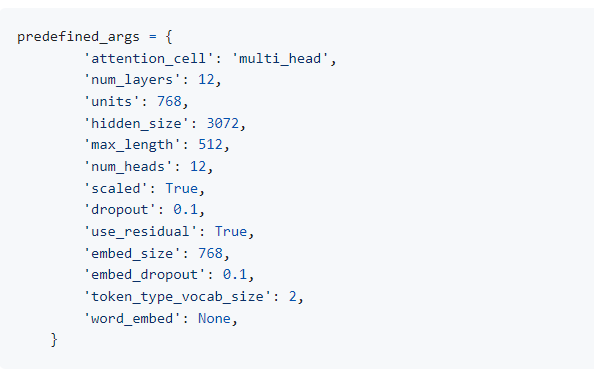

In [71]:
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


# Tokenizer

토크나이저를 사용하는 방법은 3가지가 있다.

1. tokenizer를 call 하기 => model_input형태로 반환 - input_ids , token_type_ids , attention_mask
    
2. tokenizer.tokenize() 메소드 => subwords로 구분

3. tokenizer.encode() 메소드 => ids만 반환 - decode()메소드로 토큰확인 가능

In [72]:
tokenizer("해석할 수 있니?","sep토큰 확인 문장").keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [73]:
tokenizer.tokenize("해석할 수 있니?")

['▁해석', '할', '▁수', '▁있', '니', '?']

In [74]:
ids = tokenizer.encode("해석할 수 있니?","sep토큰 확인 문장")
print(ids)
print(tokenizer.decode(ids))

[2, 5008, 7836, 2872, 3854, 5770, 258, 3, 517, 440, 389, 432, 7628, 7567, 5130, 2120, 7178, 3]
[CLS]해석할 수 있니?[SEP]sep토큰 확인 문장[SEP]


In [75]:
ids = tokenizer.encode("해석할 수 있니?","sep토큰 확인 문장")
print(ids)
print(tokenizer.decode(ids))

[2, 5008, 7836, 2872, 3854, 5770, 258, 3, 517, 440, 389, 432, 7628, 7567, 5130, 2120, 7178, 3]
[CLS]해석할 수 있니?[SEP]sep토큰 확인 문장[SEP]


In [93]:
for i in range(10):
    print(tokenizer.decode(i))

[UNK]
[PAD]
[CLS]
[SEP]
[MASK]
!
!'
!”
"
#


# Dynamic Padding

In [103]:
text = ["기존 Tokenizer와 동일하게 사전 크기는 8,002개 입니다. 일반적인 토크나이저 사용시(예: inference) 아래와 같이 사용하면 됩니다." ,
        "감사합니다 ㅎㅎㅎㅎ"]
inputs = tokenizer.batch_encode_plus(text)
print(inputs.keys())
print(inputs.token_type_ids)
for input in inputs.input_ids:
    print(len(input))

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
53
9


In [121]:
text = ["기존 Tokenizer와 동일하게 사전 크기는 8,002개 입니다. 일반적인 토크나이저 사용시(예: inference) 아래와 같이 사용하면 됩니다." ,
        ["감사합니다 ㅎㅎㅎㅎ","2번째 문장에서 이어지는 문장 테스트"]]
inputs = tokenizer.batch_encode_plus(text)
print(inputs.keys())
print(inputs.input_ids)
for input in inputs.input_ids:
    print(len(input))

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
[[2, 1300, 693, 427, 415, 392, 405, 459, 394, 6983, 1741, 7126, 7784, 2625, 4683, 5760, 624, 46, 79, 119, 5357, 517, 7139, 54, 3807, 7206, 517, 7630, 5655, 7096, 7199, 2613, 6705, 18, 6957, 249, 517, 409, 398, 394, 392, 382, 389, 40, 3108, 6983, 834, 2613, 7811, 517, 5906, 54, 3], [2, 793, 7843, 517, 493, 493, 493, 493, 3, 553, 6329, 2120, 7184, 3721, 2120, 7178, 4736, 3]]
53
18


In [128]:
text = ["기존 Tokenizer와 동일하게 사전 크기는 8,002개 입니다. 일반적인 토크나이저 사용시(예: inference) 아래와 같이 사용하면 됩니다." ,
        ["감사합니다 ㅎㅎㅎㅎ","2번째 문장에서 이어지는 문장 테스트","3번째 문장 테스트으으으"]]
inputs = tokenizer.batch_encode_plus(text)
print(inputs.keys())
print(inputs.token_type_ids)
for input in inputs.input_ids:
    print(len(input))

# BERT는 기본적으로 2개의 문장까지만 입력가능?

ValueError: too many values to unpack (expected 2)

In [104]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

padded_inputs = data_collator(inputs)

In [105]:
print(padded_inputs.input_ids)
for input in padded_inputs.input_ids:
    print(len(input))

tensor([[   2, 1300,  693,  427,  415,  392,  405,  459,  394, 6983, 1741, 7126,
         7784, 2625, 4683, 5760,  624,   46,   79,  119, 5357,  517, 7139,   54,
         3807, 7206,  517, 7630, 5655, 7096, 7199, 2613, 6705,   18, 6957,  249,
          517,  409,  398,  394,  392,  382,  389,   40, 3108, 6983,  834, 2613,
         7811,  517, 5906,   54,    3],
        [   2,  793, 7843,  517,  493,  493,  493,  493,    3,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1]])
53
53


# Model

In [101]:
import torch
from transformers import BertModel
model = BertModel.from_pretrained('skt/kobert-base-v1')
inputs = tokenizer.batch_encode_plus(["감사합니다 ㅎㅎㅎㅎ"])
out = model(input_ids = torch.tensor(inputs['input_ids']),
              attention_mask = torch.tensor(inputs['attention_mask']))

print(out.keys())
print(out.pooler_output.shape , out.last_hidden_state.shape)

odict_keys(['last_hidden_state', 'pooler_output'])
torch.Size([1, 768]) torch.Size([1, 9, 768])


In [107]:
text = ["안녕하세요. 문장1",
        "반갑습니다. 문장2",
        "마지막 문장 엄청나게 긴 문장 테스트용 문장ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ"]

inputs = data_collator(tokenizer.batch_encode_plus(text))
out = model(input_ids = torch.tensor(inputs['input_ids']),
              attention_mask = torch.tensor(inputs['attention_mask']))

print(out.keys())
print(out.pooler_output.shape , out.last_hidden_state.shape)

odict_keys(['last_hidden_state', 'pooler_output'])
torch.Size([3, 768]) torch.Size([3, 26, 768])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66664\3426822034.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = model(input_ids = torch.tensor(inputs['input_ids']),
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66664\3426822034.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(inputs['attention_mask']))


# Custom Model

In [39]:
class KoBERTforSequenceClassfication(nn.Module):
    def __init__(self,
                 num_labels=1,
                 hidden_size=768,
                 hidden_dropout_prob=0.1,
                 ):
        super().__init__()

        self.num_labels = num_labels
        self.kobert = BertModel.from_pretrained('skt/kobert-base-v1')
        self.dropout = nn.Dropout(hidden_dropout_prob)
        self.classifier = nn.Linear(hidden_size, num_labels)

        self.init_weights()

    def forward(
            self,
            input_ids=None,
            attention_mask=None,
            token_type_ids=None,
            position_ids=None,
            head_mask=None,
            inputs_embeds=None,
            labels=None,
    ):
        _ , pooled_output = self.kobert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )


        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        return logits

        '''
        if labels is not None:
            if self.num_labels == 1:
                #  We are doing regression
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            outputs = (loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions)
        '''

NameError: name 'nn' is not defined

# 문제

1. 한개의 기사를 하나의 배치 샘플로?? -> 그럼 문장 사이에 SEP토큰을 넣으면 되나?

2. 제목과 본문의 관계 -> 특수 토큰을 넣어서 [제목]제목[본문]본문